# tmp — aug24

**Motivation**: scratch notebook <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
# sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 2
device = f'cuda:{device_idx}'

print(f"host: {os.uname().nodename}")

host: mach

In [3]:
model_type = 'poisson'

In [4]:
from vae.config_vae import _ENC_CHOICES, _DEC_CHOICES

for enc, dec in itertools.product(_ENC_CHOICES, _DEC_CHOICES):
    archi = f"{enc}|{dec}"
    cfg_vae, cfg_tr = default_configs('vH16', model_type, archi)
    
    vae = HIPVAE(CFG_CLASSES[model_type](**cfg_vae))
    tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

    print('\n')
    print('-' * 80)
    print(archi)
    print_num_params(vae.input_layer)

    x = next(iter(tr.dl_trn))[0]
    with torch.no_grad():
        output = vae(x)

--------------------------------------------------------------------------------

lin|lin

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  263.2 K   |
|     ———      |    ———     |
|    fc_enc    |  131.1 K   |
|    fc_dec    |  131.1 K   |
+--------------+------------+

--------------------------------------------------------------------------------

lin|mlp

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |   27.5 K   |
|     ———      |    ———     |
|    fc_enc    |   2.6 K    |
|     dec      |   24.9 K   |
+--------------+------------+

--------------------------------------------------------------------------------

lin|conv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  323.4 K   |
|     ———      |    ———     |
|    fc_enc    |   2.6 K    |
|    fc_dec    |   20.5 K   |
|     dec      |  300.3 K   |
+--------------+------------+

--------------------------------------------------------------------------------

lin|deconv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  187.0 K   |
|     ———      |    ———     |
|    fc_enc    |   2.6 K    |
|    fc_dec    |   20.5 K   |
|     dec      |  164.0 K   |
+--------------+------------+

--------------------------------------------------------------------------------

mlp|lin

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  553.5 K   |
|     ———      |    ———     |
|     enc      |  421.4 K   |
|    fc_dec    |  131.1 K   |
+--------------+------------+

--------------------------------------------------------------------------------

mlp|mlp

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |   49.8 K   |
|     ———      |    ———     |
|     enc      |   24.9 K   |
|     dec      |   24.9 K   |
+--------------+------------+

--------------------------------------------------------------------------------

mlp|conv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  345.7 K   |
|     ———      |    ———     |
|     enc      |   24.9 K   |
|    fc_dec    |   20.5 K   |
|     dec      |  300.3 K   |
+--------------+------------+

--------------------------------------------------------------------------------

mlp|deconv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  209.4 K   |
|     ———      |    ———     |
|     enc      |   24.9 K   |
|    fc_dec    |   20.5 K   |
|     dec      |  164.0 K   |
+--------------+------------+

--------------------------------------------------------------------------------

conv|lin

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  1.9 Mil   |
|     ———      |    ———     |
|     stem     |    320     |
|     enc      |  680.6 K   |
|    fc_enc    |  1.1 Mil   |
|    fc_dec    |  131.1 K   |
+--------------+------------+

--------------------------------------------------------------------------------

conv|mlp

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  726.3 K   |
|     ———      |    ———     |
|     stem     |    320     |
|     enc      |  680.6 K   |
|    fc_enc    |   20.5 K   |
|     dec      |   24.9 K   |
+--------------+------------+

--------------------------------------------------------------------------------

conv|conv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  1.0 Mil   |
|     ———      |    ———     |
|     stem     |    320     |
|     enc      |  680.6 K   |
|    fc_enc    |   20.5 K   |
|    fc_dec    |   20.5 K   |
|     dec      |  300.3 K   |
+--------------+------------+

--------------------------------------------------------------------------------

conv|deconv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  885.9 K   |
|     ———      |    ———     |
|     stem     |    320     |
|     enc      |  680.6 K   |
|    fc_enc    |   20.5 K   |
|    fc_dec    |   20.5 K   |
|     dec      |  164.0 K   |
+--------------+------------+

--------------------------------------------------------------------------------

jac|lin

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  132.1 K   |
|     ———      |    ———     |
|    fc_dec    |  131.1 K   |
+--------------+------------+

--------------------------------------------------------------------------------

jac|mlp

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |   24.9 K   |
|     ———      |    ———     |
|     dec      |   24.9 K   |
+--------------+------------+

--------------------------------------------------------------------------------

jac|conv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  320.8 K   |
|     ———      |    ———     |
|    fc_dec    |   20.5 K   |
|     dec      |  300.3 K   |
+--------------+------------+

--------------------------------------------------------------------------------

jac|deconv

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  184.5 K   |
|     ———      |    ———     |
|    fc_dec    |   20.5 K   |
|     dec      |  164.0 K   |
+--------------+------------+

In [30]:
from base.common import *


def _build_deconv_dec(nch: int, kws: dict):
	return nn.Sequential(
		UnFlatten(nch),
		nn.ConvTranspose2d(nch, nch // 2, kernel_size=4, stride=2, padding=1),
		get_act_fn(kws['act_fn'], inplace=True),
		nn.ConvTranspose2d(nch // 2, nch // 4, kernel_size=4, stride=2, padding=1),
		get_act_fn(kws['act_fn'], inplace=True),
		nn.ConvTranspose2d(nch // 4, nch // 8, kernel_size=4, stride=2, padding=1),
		get_act_fn(kws['act_fn'], inplace=True),
		nn.ConvTranspose2d(nch // 8, 1, (1, 1), stride=1, padding=0),
	)

In [31]:
layer = _build_deconv_dec(128, {'act_fn': 'relu'})

spat_dim = 4
x = torch.randn(123, 128 * spat_dim ** 2)
y = layer(x)
y.shape

torch.Size([123, 1, 32, 32])

## Load model to analyze

In [3]:
# model_name = 'poisson_uniform_c(-4)_vH16_t-20_z-[512]_k-32_<jac|lin>'
# fit_name = 'mc_b500-ep600-lr(0.002)_beta(10:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_29,12:13)'

model_name = 'poisson_uniform_c(-4)_vH16_t-5_z-[512]_k-32_<jac|lin>'
fit_name = 'mc_b500-ep600-lr(0.002)_beta(3:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_29,18:12)'

tr, meta = load_model(model_name, fit_name, device=device, strict=False)
print(meta['checkpoint'])

600

In [4]:
self = tr.model.input_layer
print(self)

PoissonLayer(dim=512, input_dim=16, temp=0.05, n_exp=83, beta=1, eps=1)

In [4]:
x = next(iter(tr.dl_vld))[0]
output = tr.model(x)
output = output.stack()

In [5]:
list(output)

['recon', 'dist', 'spks', 'ff', 'fb', 'loss_kl', 'loss_recon']

In [3]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('MNIST', model_type, 'jac|deconv')

cfg_vae['n_latents'] = 50
cfg_vae['init_scale'] = 1e-2
cfg_vae['seq_len'] = 5

cfg_tr['lr'] = 2e-3
cfg_tr['epochs'] = 100
cfg_tr['batch_size'] = 60
cfg_tr['kl_beta'] = 1.0

In [4]:
vae = HIPVAE(CFG_CLASSES[model_type](**cfg_vae))
vae.input_layer.fc_enc = None

tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

In [5]:
vae.print()

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|    HIPVAE   |  399.6 K   |
|     ———     |    ———     |
|  layers.L_0 |  399.6 K   |
+-------------+------------+

In [6]:
x = next(iter(tr.dl_trn))[0]
x = x.flatten(start_dim=1)

self = tr.model.input_layer
self.reset_state(len(x))

In [7]:
dist, spks, pred = self.generate(0.2, True)
res = x - pred

In [8]:
jacobian = self.jacobian(spks).squeeze()
jacobian.shape

torch.Size([60, 784, 50])

In [9]:
spks.shape

torch.Size([60, 50])

In [10]:
vae(x)

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.99 GiB. GPU  has a total capacity of 47.41 GiB of which 316.12 MiB is free. Including non-PyTorch memory, this process has 47.08 GiB memory in use. Of the allocated memory 44.52 GiB is allocated by PyTorch, and 2.06 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

+-------------+------------+
| Module Name | Num Params |
+-------------+------------+
|    HIPVAE   |  131.6 K   |
|     ———     |    ———     |
|  layers.L_0 |  131.6 K   |
+-------------+------------+

poisson_uniform_c(-4)_vH16_t-1_z-[512]_<lin|lin>
mc_b500-ep1000-lr(0.002)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_28,18:23)

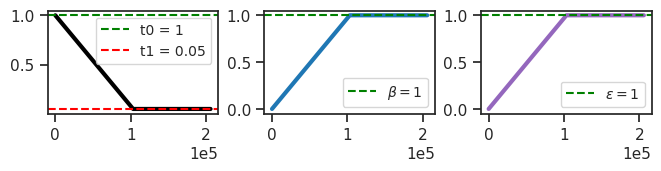

In [5]:
vae.print()
print(f"{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n")
tr.show_schedules()

In [6]:
print_num_params(vae.input_layer)

+--------------+------------+
| Module Name  | Num Params |
+--------------+------------+
| PoissonLayer |  131.6 K   |
|     ———      |    ———     |
|    fc_dec    |  131.1 K   |
+--------------+------------+

In [6]:
comment = f"jacobian"
fit_name = f"{comment}_{tr.cfg.name()}"

tr.train(fit_name=fit_name)

epoch # 1000, avg loss: 167.010530: 100%|████████████████████████████████████████████████████| 1000/1000 [1:11:48<00:00,  4.31s/it]


In [3]:
model_name = 'poisson_uniform_c(-4)_vH16_t-20_z-[512]_<lin|lin>'
fit_name = 'bal-None_mc_b500-ep300-lr(0.002)_beta(80:0x0.5)_temp(0.01:lin-0.5)_gr(500)_(2024_08_27,14:50)'
tr, meta = load_model(model_name=model_name, fit_name=fit_name, device=device)

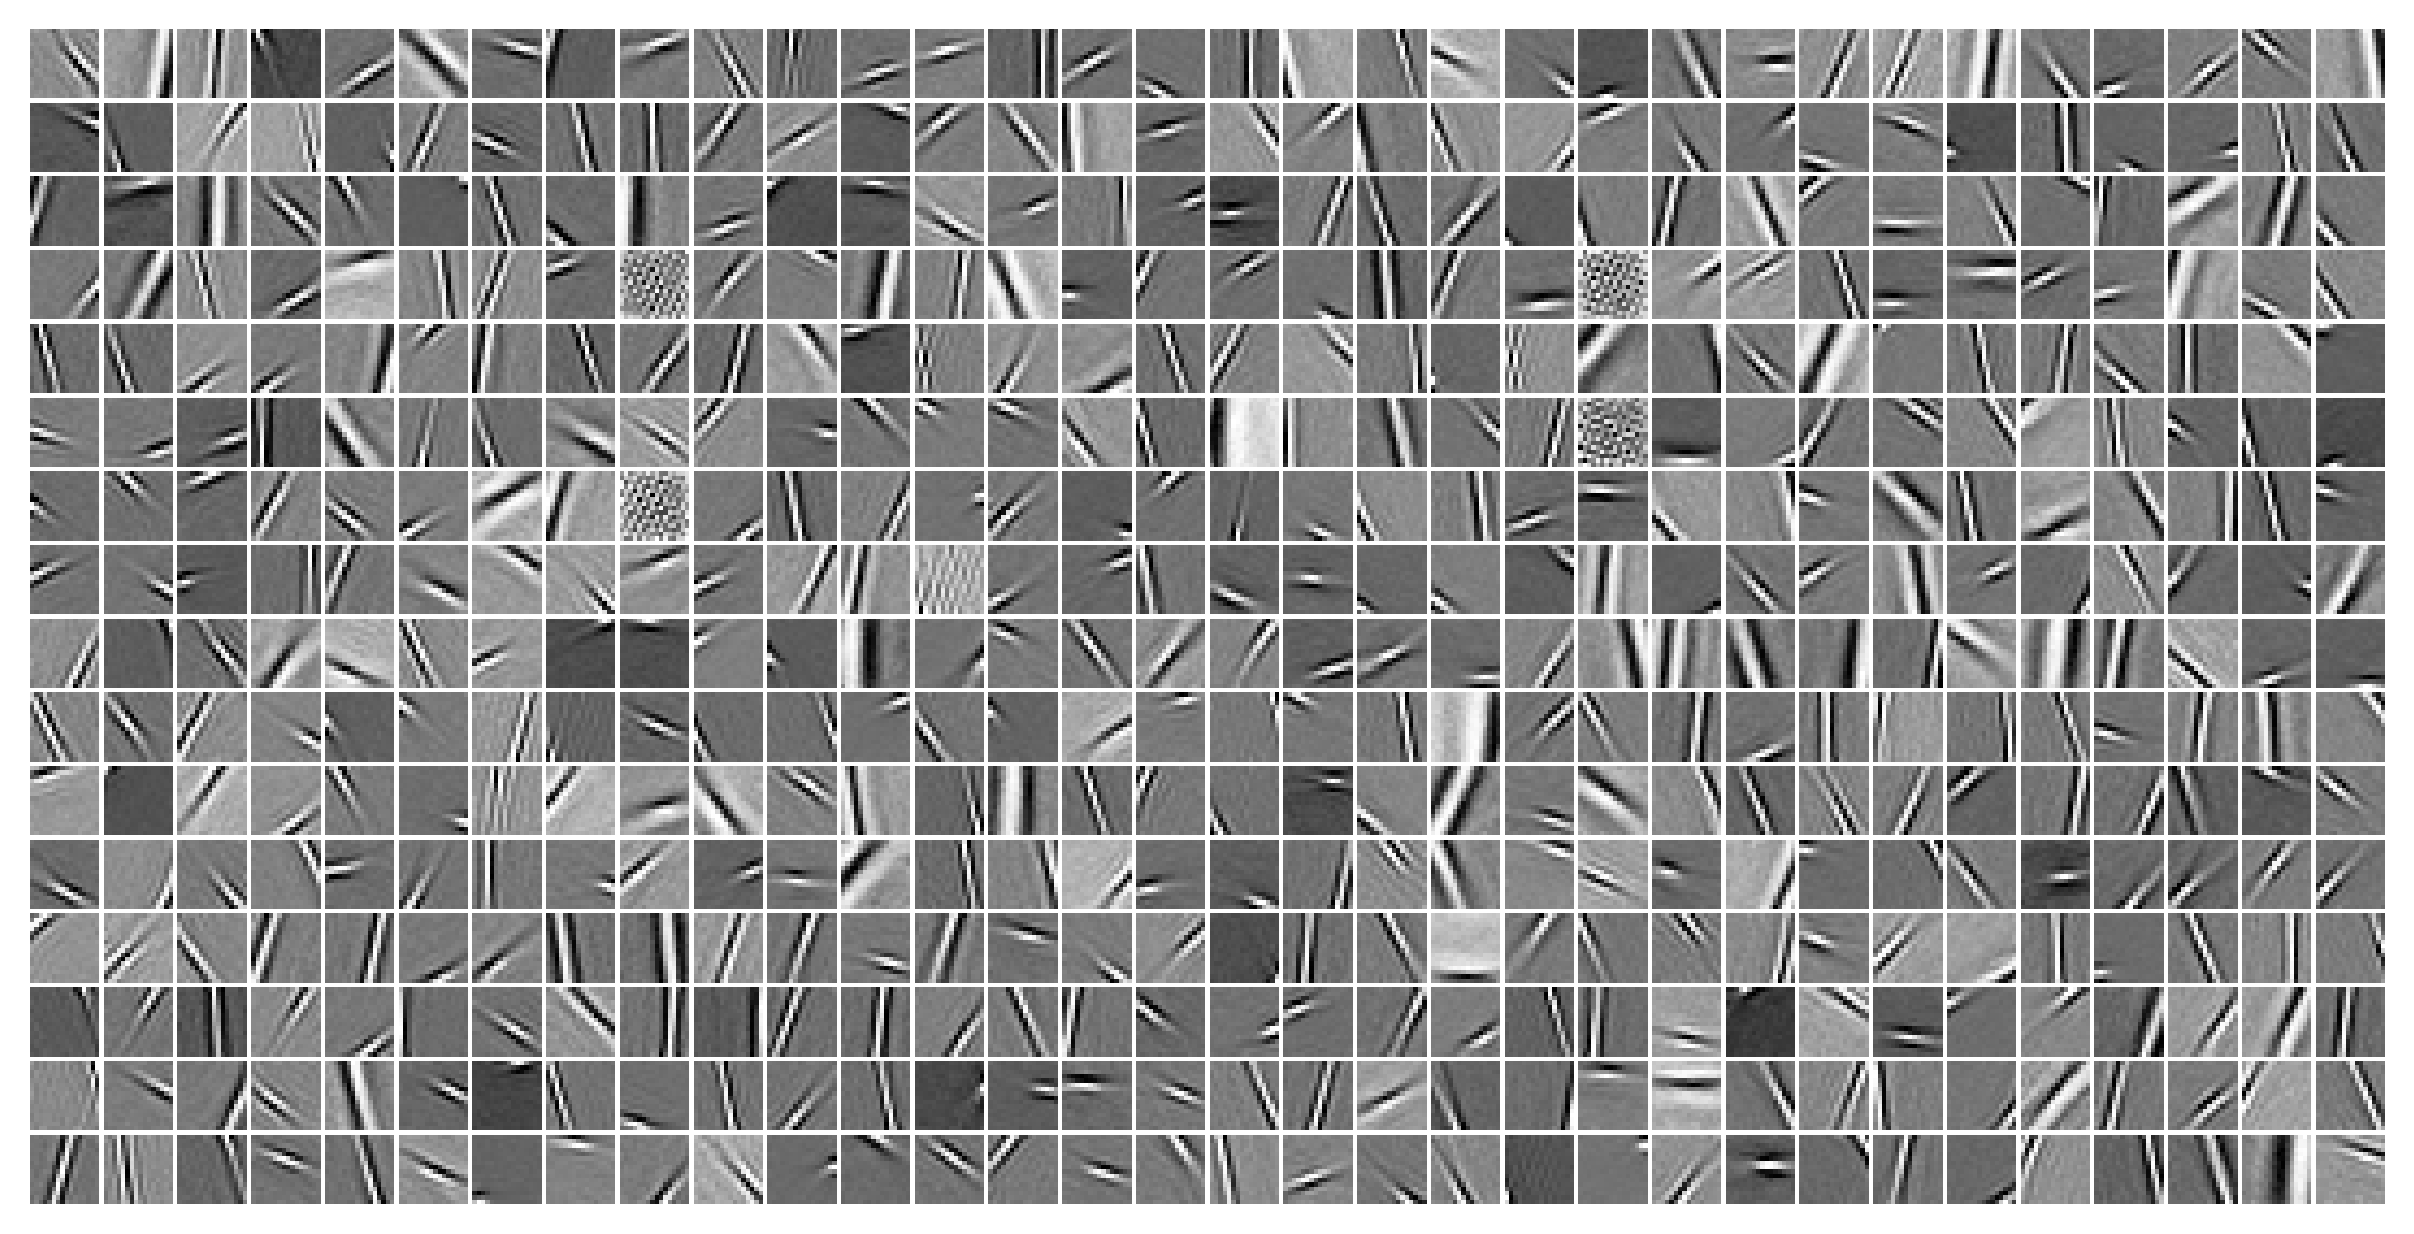

In [4]:
tr.model.show('dec', dpi=300);

In [5]:


x = next(iter(tr.dl_vld))[0]
self.reset_state(len(x))

In [6]:
dist, spks, pred = self.generate(0.2, True)
residual = x - pred
residual = residual.flatten(start_dim=1)

jacobian = torch.autograd.functional.jacobian(
    func=tr.model.input_layer.fc_dec,
    inputs=tr.to(torch.randn(512)),  # z[123, -1, :],
)
du = F.linear(residual, jacobian.T)
self.update_state(du)

dist, spks, pred = self.generate(0.2, True)
y = self.decode(spks)

loss_mse = torch.linalg.norm(x - y)
loss_mse.backward()

In [5]:
output = tr.model(x)
output = output.stack()
list(output)

['recon', 'dist', 'spks', 'ff', 'fb', 'loss_kl', 'loss_recon']

In [6]:
z = output['spks']
z.shape

torch.Size([500, 20, 512])

In [31]:
%%time

jacobian = torch.autograd.functional.jacobian(
    func=tr.model.input_layer.decode,
    inputs=tr.to(torch.randn(512)),
)
jacobian.shape

CPU times: user 101 ms, sys: 4.27 ms, total: 105 ms
Wall time: 105 ms


torch.Size([1, 1, 16, 16, 512])

In [19]:
tr.model.input_layer.decode(tr.to(torch.randn(512))).shape

torch.Size([1, 1, 16, 16])

In [32]:
%%time

jacobian = torch.autograd.functional.jacobian(
    func=tr.model.input_layer.fc_dec,
    inputs=tr.to(torch.randn(512)),  # z[123, -1, :],
)
jacobian.shape

CPU times: user 94.1 ms, sys: 6.09 ms, total: 100 ms
Wall time: 99.9 ms


torch.Size([256, 512])

In [9]:
tr.model.input_layer.fc_enc.weight.shape

torch.Size([512, 256])

In [10]:
x2p = tonp(jacobian).T.reshape(512, 16, 16)

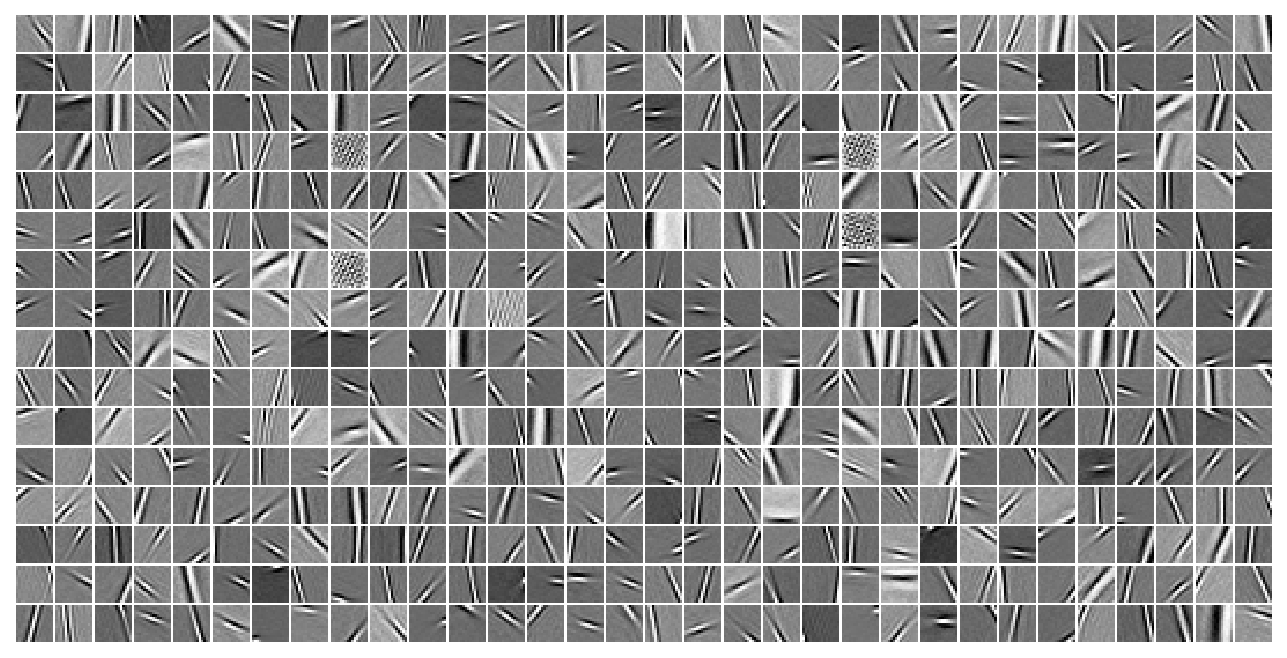

In [11]:
from figures.imgs import plot_weights
plot_weights(x2p);

In [12]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'lin|lin')

vae = HIPVAE(CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

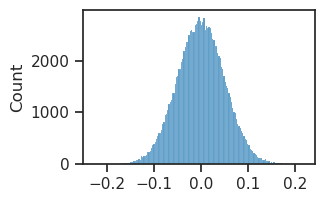

In [16]:
sns.histplot(tonp(tr.model.input_layer.fc_enc.weight).ravel());

In [3]:
kl_balancer_coeff(5, 'equal'), kl_balancer_coeff(5, 'linear'), kl_balancer_coeff(5, 'square'), kl_balancer_coeff(5, 'exp')

(tensor([1., 1., 1., 1., 1.]),
 tensor([5., 4., 3., 2., 1.]),
 tensor([25., 16.,  9.,  4.,  1.]),
 tensor([54.5982, 20.0855,  7.3891,  2.7183,  1.0000]))

In [4]:
model_name = 'poisson_uniform_c(-4)_vH16_t-20_z-[512]_<lin|lin>'
fit_name = 'bal-square_mc_b500-ep300-lr(0.002)_beta(80:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_26,16:18)'
tr, meta = load_model(model_name=model_name, fit_name=fit_name, device=device)
print(meta)

{
    'timestamp': '2024_08_26,16:18',
    'checkpoint': 250,
    'global_step': 51500,
    'root': 
'/home/hadi/Projects/PoissonVAE/models/poisson_uniform_c(-4)_vH16_t-20_z-[512]_<lin|lin>/bal-square_mc_b500-ep300-l
r(0.002)_beta(80:0x0.5)_temp(0.05:lin-0.5)_gr(500)_(2024_08_26,16:18)',
    'file': 'HIPVAE+TrainerVAE-0250_(2024_08_26,17:34).pt'
}

In [5]:
with torch.inference_mode():
    x = next(iter(tr.dl_vld))[0]
    dist, kl, recon_batch = tr._fun(x)
    kl_batch = torch.sum(kl, dim=2)

kl_batch.shape, recon_batch.shape

(torch.Size([500, 20]), torch.Size([500, 20]))

In [6]:
d2p = []
for fun in ['equal', 'linear', 'sqrt', 'square', 'exp']:
    tr.alphas = kl_balancer_coeff(tr.model.cfg.seq_len, fun)
    tr.alphas = tr.to(tr.alphas)

    kl_balanced, gamma = kl_balancer(
        kl_batch=kl_batch,
        alpha=tr.alphas,
        balance=True,
    )
    d2p.append({
        'fun': [fun] * len(gamma),
        'time': range(len(gamma)),
        'gamma': tonp(gamma),
    })

d2p = pd.DataFrame(merge_dicts(d2p))

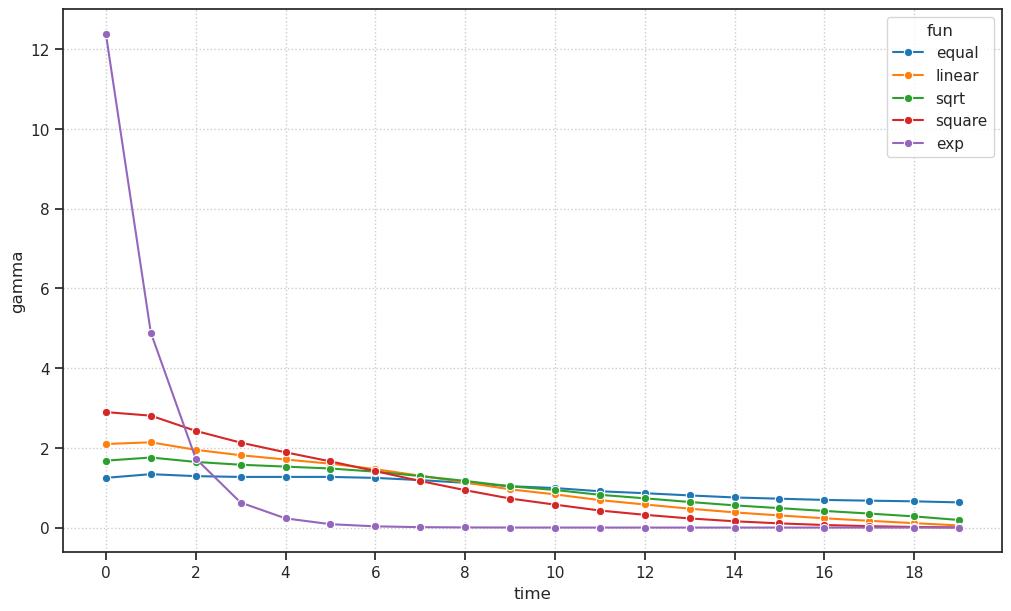

In [9]:
fig, ax = create_figure(1, 1, (10, 6))
sns.lineplot(data=d2p, x='time', y='gamma', hue='fun', marker='o', ax=ax)
ax.locator_params(axis='x', nbins=15)
ax.grid()
plt.show()

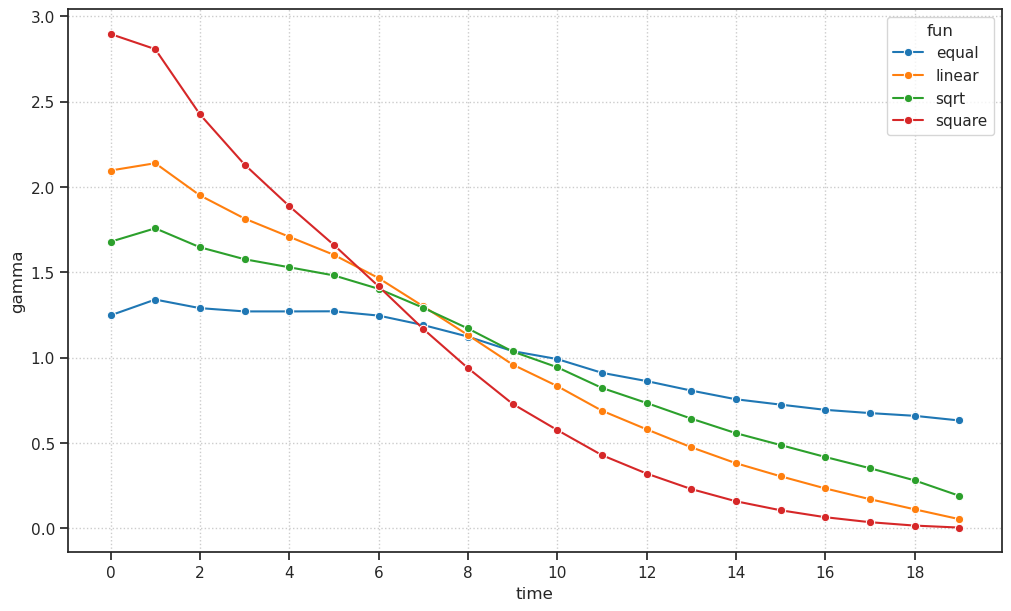

In [10]:
fig, ax = create_figure(1, 1, (10, 6))
sns.lineplot(
    data=d2p.loc[d2p['fun'] != 'exp'],
    x='time',
    y='gamma',
    hue='fun',
    marker='o',
    ax=ax,
)
ax.locator_params(axis='x', nbins=15)
ax.grid()
plt.show()

In [11]:
gamma.sum()

tensor(20., device='cuda:0')

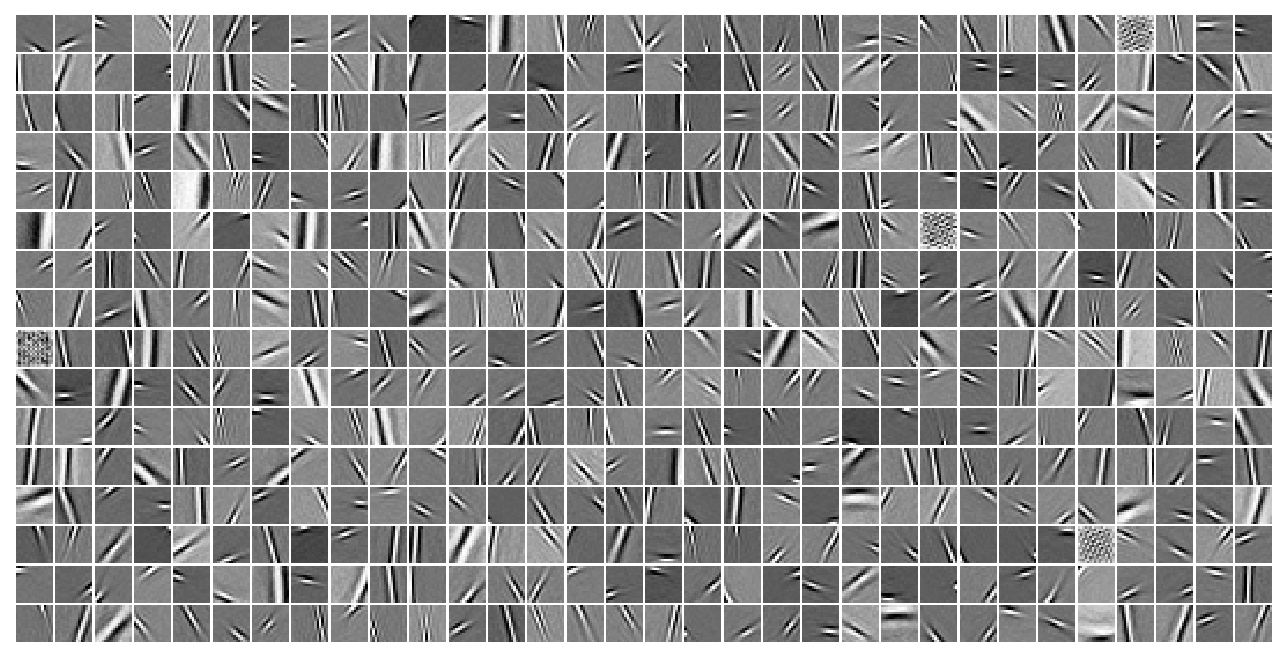

In [12]:
tr.model.show('dec');

(torch.Size([500, 10, 512]), torch.Size([500, 10]))

In [8]:
kl_time = torch.mean(torch.sum(kl, dim=-1), dim=0)
kl_time.shape

torch.Size([10])

In [ ]:
balanced_kl, gamma, kl_vals = kl_balancer(
    kl_all=kl_all,
    alpha=self.alphas,
    coeff=self.betas[gstep],
    beta=self.cfg.kl_beta,
)

In [9]:
kl_vals = torch.mean(kl, dim=0)
kl_vals.shape

torch.Size([10, 512])

In [4]:
print(tr.model.input_layer)

PoissonLayer(dim=512, input_dim=16, temp=1, eps=0, n_exp=263)

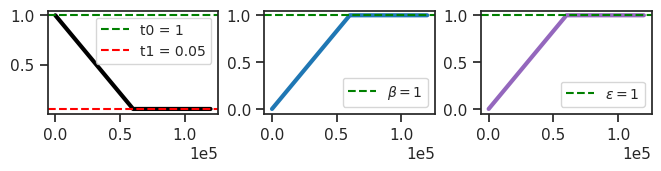

In [5]:
tr.show_schedules()

In [ ]:
with torch.inference_mode():
    x = next(iter(tr.dl_vld))[0]
    output = vae(x)

output = output.stack()
output['loss_kl'].shape, output['loss_recon'].shape

In [4]:
self = vae.input_layer

In [5]:
batch_size = 11

x = torch.zeros((batch_size, 512))
x[4] = torch.arange(1, 512 + 1)

x = tr.to(x)

x.shape

torch.Size([11, 512])

In [6]:
delta = F.pad(
    input=x,
    pad=self.pad,
    mode='circular',
)
delta = F.conv1d(
    input=delta.unsqueeze(1),
    weight=self.conv_kernel,
).squeeze()

delta.shape

torch.Size([11, 512])

In [7]:
x[4]

tensor([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
        109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
        133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
        145., 146., 147., 148., 149., 15

In [8]:
delta[4]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [9]:
conv_kernel = torch.tensor([1, 2, -2, 2, 1])
conv_kernel = torch.tensor(
    data=conv_kernel,
    dtype=torch.float,
).reshape(1, 1, -1).to(device)
self.conv_kernel = nn.Parameter(
    data=conv_kernel,
    requires_grad=True,
)

In [10]:
delta = F.pad(
    input=x,
    pad=self.pad,
    mode='circular',
)
delta = F.conv1d(
    input=delta.unsqueeze(1),
    weight=self.conv_kernel,
).squeeze()

delta.shape

torch.Size([11, 512])

In [11]:
x[4]

tensor([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,
         25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,
         37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
         49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
         61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,
         73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,
         97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
        109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
        133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
        145., 146., 147., 148., 149., 15

In [12]:
delta[4]

tensor([1540.,  520.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,   80.,
          84.,   88.,   92.,   96.,  100.,  104.,  108.,  112.,  116.,  120.,
         124.,  128.,  132.,  136.,  140.,  144.,  148.,  152.,  156.,  160.,
         164.,  168.,  172.,  176.,  180.,  184.,  188.,  192.,  196.,  200.,
         204.,  208.,  212.,  216.,  220.,  224.,  228.,  232.,  236.,  240.,
         244.,  248.,  252.,  256.,  260.,  264.,  268.,  272.,  276.,  280.,
         284.,  288.,  292.,  296.,  300.,  304.,  308.,  312.,  316.,  320.,
         324.,  328.,  332.,  336.,  340.,  344.,  348.,  352.,  356.,  360.,
         364.,  368.,  372.,  376.,  380.,  384.,  388.,  392.,  396.,  400.,
         404.,  408.,  412.,  416.,  420.,  424.,  428.,  432.,  436.,  440.,
         444.,  448.,  452.,  456.,  460.,  464.,  468.,  472.,  476.,  480.,
         484.,  488.,  492.,  496.,  500.,  504.,  508.,  512., 

In [6]:
x = next(iter(tr.dl_vld))[0]
output = vae(x)
output = output.stack()

In [8]:
loss = output['loss_recon'].sum()
loss.backward()

In [9]:
self.log_speed

Parameter containing:
tensor([-10.], device='cuda:1', requires_grad=True)

In [10]:
self.log_speed.grad

tensor([-2549872.2500], device='cuda:1')

torch.Size([11, 512])

In [7]:
ker

tensor([4.5400e-05], device='cuda:1', grad_fn=<ExpBackward0>)

In [10]:
layer = vae.input_layer

In [11]:
layer.log_speed.data.fill_(0)
layer.log_speed

Parameter containing:
tensor([0.], device='cuda:1', requires_grad=True)

In [12]:
ker = torch.exp(layer.log_speed)
ker = torch.tensor([-ker, ker]).view(1, 1, 2)
ker

tensor([[[-1.,  1.]]])

In [13]:
batch_size = 11
x = torch.zeros((batch_size, 1, 8))
x.shape

torch.Size([11, 1, 8])

In [14]:
x[..., 5] = 1
x[..., 6] = 3

In [20]:
y = F.conv1d(
    input=F.pad(x, (0, 1), mode='circular'),
    weight=ker,
).squeeze()
y.shape

torch.Size([11, 8])

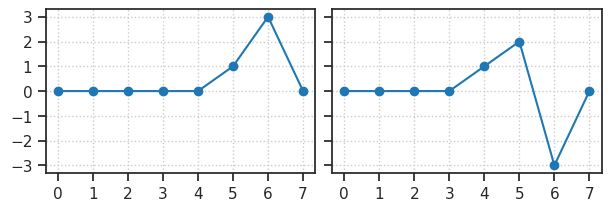

In [21]:
fig, axes = create_figure(1, 2, sharey='row', sharex='row')

axes[0].plot(tonp(x)[4, 0], marker='o')
axes[1].plot(tonp(y)[4], marker='o')
axes[0].locator_params(axis='x', nbins=8)
axes[0].locator_params(axis='y', nbins=8)
add_grid(axes);

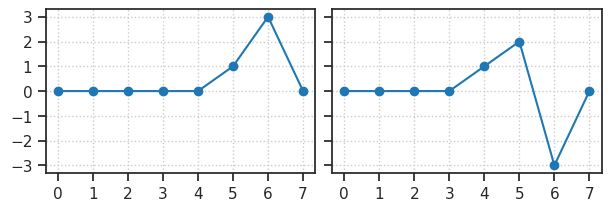

torch.Size([11, 1, 8])

In [24]:
y = F.conv1d(
    input=F.pad(x, (0, 1), mode='circular'),
    weight=ker,
).squeeze()
y.shape

torch.Size([11, 8])

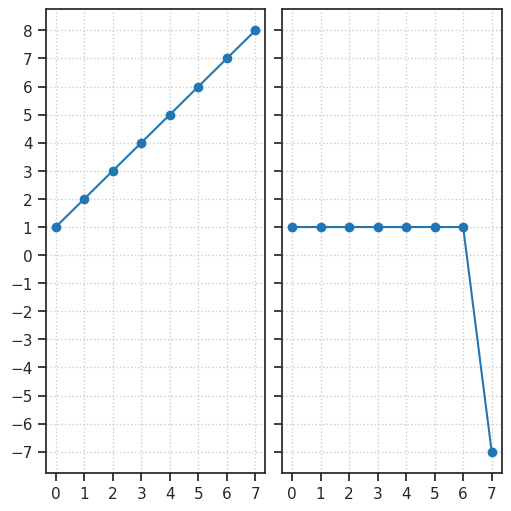

In [25]:
fig, axes = create_figure(1, 2, (5, 5), sharey='row', sharex='row')

axes[0].plot(tonp(x)[4, 0], marker='o')
axes[1].plot(tonp(y)[4], marker='o')
axes[0].locator_params(axis='x', nbins=8)
axes[0].locator_params(axis='y', nbins=20)
add_grid(axes);

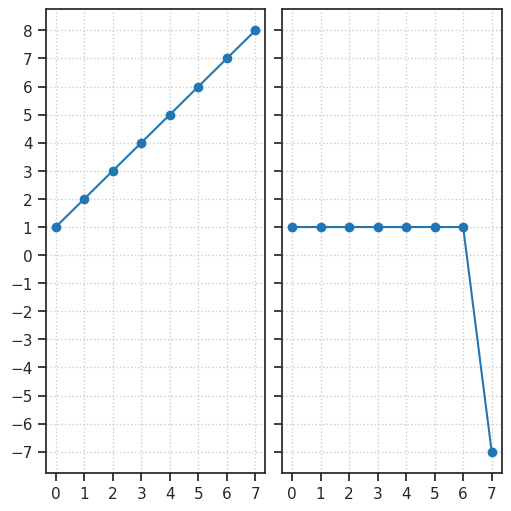

In [9]:
dataset = 'BALLS16'
re.search(r'\d+', dataset)

<re.Match object; span=(5, 7), match='16'>

In [7]:
digits

[1, 6]

In [21]:
MULT = 2
input_sz = 64

n_layers = int(np.emath.logn(
	MULT, input_sz // 4))
n_layers

4

In [28]:
find_factors(32, 2)

[4, 8]

In [3]:
from base.common import *

In [4]:
conv_layer = Conv2D(10, 531, 3, fit_gain=True)
conv_layer.lognorm.shape, conv_layer.get_weight().shape

(torch.Size([531, 1, 1, 1]), torch.Size([531, 10, 3, 3]))

In [9]:
print(deconv_layer)

DeConv2D(
  (_layer): ConvTranspose2d(10, 531, kernel_size=(3, 3), stride=(1, 1))
)

In [6]:
deconv_layer = DeConv2D(10, 531, 3, fit_gain=True)
deconv_layer.lognorm.shape, deconv_layer.get_weight().shape

(torch.Size([1, 531, 1, 1]), torch.Size([10, 531, 3, 3]))

In [6]:
lin_layer = Linear(10, 531, fit_gain=True)
lin_layer.lognorm.shape, lin_layer.get_weight().shape

(torch.Size([531, 1]), torch.Size([531, 10]))

In [7]:
conv_layer = Conv2D(10, 531, 3, fit_gain=True)
conv_layer.lognorm.shape, conv_layer.get_weight().shape

(torch.Size([531, 1, 1, 1]), torch.Size([531, 10, 3, 3]))

In [ ]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('CIFAR16', model_type, 'lin|lin')
cfg_vae['seq_len'] = 10

vae = HIPVAE(CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

print(f"{vae.cfg.name()}\n{tr.cfg.name()}")

In [5]:
from base.common import *


torch.Size([531, 1])

torch.Size([531, 10])

In [11]:
tr.dl_trn.dataset.tensors[0].shape

torch.Size([200000, 1, 16, 16])

## BALLS dataset
---
---

In [3]:
from base.balls import balls_save_dataset
root = add_home('Datasets/BALLS')

In [4]:
%%time

for npix in [16, 32, 64]:
    balls_save_dataset(root, npix=npix)

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-16

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-32

[PROGRESS] 'z.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

[PROGRESS] 'x.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

[PROGRESS] 'z_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

[PROGRESS] 'x_tst.npy' saved at
/home/hadi/Datasets/BALLS/npix-64

CPU times: user 29 s, sys: 7.82 s, total: 36.8 s
Wall time: 36.9 s


---
---

In [5]:
model_type = 'poisson'
cfg_vae, cfg_tr = default_configs('vH16', model_type, 'lin|lin')
cfg_vae['seq_len'] = 10

In [6]:
vae = HIPVAE(CFG_CLASSES[model_type](**cfg_vae))
tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

print(f"{vae.cfg.name()}\n{tr.cfg.name()}")

poisson_uniform_c(-4)_vH16_t-10_z-[512]_<lin|lin>
mc_b500-ep600-lr(0.002)_beta(1:0x0.5)_temp(0.05:lin-0.5)_gr(500)

In [10]:
print(vae.input_layer)

PoissonLayer(dim=512, input_dim=16, temp=1, n_exp=263)

In [3]:
from analysis.final import analyze_fits

model_name = 'poisson_uniform_c(-4)_vH16_t-5_z-[512]_fp_nrm-none_<lin|lin>'
fits = [
    'beta=0.5_mc_b1000-ep1000-lr(0.002)_beta(0.5:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:19)',
    'beta=1.0_mc_b1000-ep1000-lr(0.002)_beta(1:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:17)',
    'beta=2_mc_b1000-ep1000-lr(0.002)_beta(2:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:21)',
    'beta=6_mc_b1000-ep1000-lr(0.002)_beta(6:0x0.5)_temp(0.1:lin-0.5)_gr(500)_(2024_08_19,09:22)',
]
fits = [pjoin(model_name, f) for f in fits]

In [ ]:
tr, meta = load_quick(fits[0], lite=False)

In [7]:
data, loss, etc = tr.validate()

In [8]:
print({k: v.shape for k, v in loss.items()})

{'kl': (25811, 5), 'kl_diag': (5, 512), 'recon': (25811, 5), 'nelbo': (25811, 5)}